# Support Vector Machine

[Heart Failure Prediction](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [3]:
df.shape

(299, 13)

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
# defining the predictive and target variables
x = df.drop(columns = 'DEATH_EVENT', axis = 1).values
y = df['DEATH_EVENT'].values

In [6]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
parameters = {'penalty' :['l1', 'l2'],
              'C':[1.0, 1.5, 5, 10]}


grid_svm_linear = GridSearchCV(LinearSVC(), parameters, cv = 5)
grid_svm_linear.fit(x_train, y_train)

In [8]:
# instance of model
svm_linear = grid_svm_linear.best_estimator_
svm_linear

LinearSVC(C=10)

In [9]:
# best parameters
grid_svm_linear.best_params_

{'C': 10, 'penalty': 'l2'}

In [10]:
# best score
grid_svm_linear.best_score_

0.8036347517730498

In [11]:
parameters = {
    'kernel': ['sigmoid', 'rbf'],
    'C':[1.0,1.5,5, 3,5]
}


grid_svm = GridSearchCV(SVC(), parameters, cv = 5)
grid_svm.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 1.5, 5, 3, 5],
                         'kernel': ['sigmoid', 'rbf']})

In [12]:
# instance of model
svm = grid_svm.best_estimator_
svm

SVC(kernel='sigmoid')

In [13]:
# best parameters
grid_svm.best_params_

{'C': 1.0, 'kernel': 'sigmoid'}

In [14]:
# best score
grid_svm.best_score_

0.8078900709219857

In [15]:
parameters = {
    'kernel': ['poly'],
    'degree': [3,5,7,10],
    'C':[1.0,1.5,2,5, 3, 4,5]
}


grid_svm_poly = GridSearchCV(SVC(), parameters, cv = 5)
grid_svm_poly.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 1.5, 2, 5, 3, 4, 5],
                         'degree': [3, 5, 7, 10], 'kernel': ['poly']})

In [16]:
# instance of model
svm_poly = grid_svm_poly.best_estimator_
svm_poly

SVC(C=2, kernel='poly')

In [17]:
#best parameters
grid_svm_poly.best_params_

{'C': 2, 'degree': 3, 'kernel': 'poly'}

In [18]:
# best score
grid_svm_poly.best_score_

0.7618794326241135

Performance Linear SVM: 

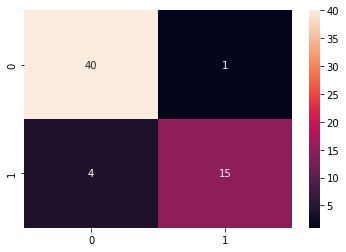

In [32]:
matrix_conf = confusion_matrix(y_test, svm_linear.predict(x_test))
sns.heatmap(matrix_conf, annot = True)

In [33]:
print(classification_report(y_test, svm_linear.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        41
           1       0.94      0.79      0.86        19

    accuracy                           0.92        60
   macro avg       0.92      0.88      0.90        60
weighted avg       0.92      0.92      0.91        60



In [34]:
# Accuracy
round(accuracy_score(y_test, svm_linear.predict(x_test))*100,2)

91.67

Performance SVM with Sigmoid kernel

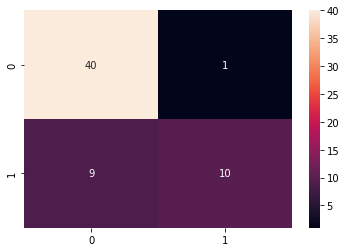

In [23]:
# confusion matrix linear svm 
matrix_conf = confusion_matrix(y_test, svm.predict(x_test))
sns.heatmap(matrix_conf, annot = True)

In [26]:
print(classification_report(y_test, svm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        41
           1       0.91      0.53      0.67        19

    accuracy                           0.83        60
   macro avg       0.86      0.75      0.78        60
weighted avg       0.85      0.83      0.82        60



In [27]:
#Accuracy
round(accuracy_score(y_test, svm.predict(x_test))*100,2)

83.33

Performance SVM with polynomial kernel

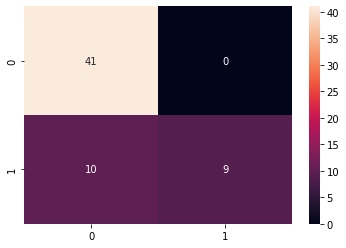

In [28]:
# confusion matrix linear svm poly
matrix_conf = confusion_matrix(y_test, svm_poly.predict(x_test))
sns.heatmap(matrix_conf, annot = True)

In [29]:
print(classification_report(y_test, svm_poly.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        41
           1       1.00      0.47      0.64        19

    accuracy                           0.83        60
   macro avg       0.90      0.74      0.77        60
weighted avg       0.87      0.83      0.81        60



In [30]:
# performance in the test with oversampling
round(accuracy_score(y_test, svm_poly.predict(x_test))*100,2)

83.33